# Test d'implémentation du G-test 

La formule du g-test est : $G = 2\sum O_i \times (\frac{O_i}{E_i})$  

avec, $O_i$ les effectifs observés et $E_i$ les effectiffs théoriques.

In [247]:
import numpy as np
import pandas as pd
import math
from scipy.stats import chisquare, distributions, power_divergence, chi2_contingency
import matplotlib.pyplot as plt

# Fonction pour réaliser le G-test

Cette fonction provient de cette page GitHub https://gist.github.com/brentp/570896  
Néanmoins un des fonction, chisqprob, est aujourd'hui obsolète et il est suggéré de la remplacer par la fonction stats.distributions.chi2.sf

In [36]:
def gtest(f_obs, f_exp=None, ddof=0):
    """
    http://en.wikipedia.org/wiki/G-test
    The G test can test for goodness of fit to a distribution
    Parameters
    ----------
    f_obs : array
        observed frequencies in each category
    f_exp : array, optional
        expected frequencies in each category.  By default the categories are
        assumed to be equally likely.
    ddof : int, optional
        adjustment to the degrees of freedom for the p-value
    Returns
    -------
    chisquare statistic : float
        The chisquare test statistic
    p : float
        The p-value of the test.
    Notes
    -----
    The p-value indicates the probability that the observed distribution is
    drawn from a distribution given frequencies in expected.
    So a low p-value inidcates the distributions are different.
    Examples
    --------
    >>> gtest([9.0, 8.1, 2, 1, 0.1, 20.0], [10, 5.01, 6, 4, 2, 1])
    (117.94955444335938, 8.5298516190930345e-24)
    >>> gtest([1.01, 1.01, 4.01], [1.00, 1.00, 4.00])
    (0.060224734246730804, 0.97033649350189344)
    >>> gtest([2, 1, 6], [4, 3, 2])
    (8.2135343551635742, 0.016460903780063787)
    References
    ----------
    http://en.wikipedia.org/wiki/G-test
    """
    f_obs = np.asarray(f_obs, 'f')
    k = f_obs.shape[0]
    f_exp = np.array([np.sum(f_obs, axis=0) / float(k)] * k, 'f') \
                if f_exp is None \
                else np.asarray(f_exp, 'f')
    g = 2 * np.add.reduce(f_obs * np.log(f_obs / f_exp))
    return g, distributions.chi2.sf(g, k - 1 - ddof)

### Tests de la foncton gtest

In [37]:
print( gtest([9.0, 8.1, 2, 1, 0.1, 20.0], [10, 5.01, 6, 4, 2, 1]) )
print( gtest([1.01, 1.01, 4.01], [1.00, 1.00, 4.00]) )
print(  gtest([2, 1, 6], [4, 3, 2]) )

(117.94955444335938, 8.529851619093035e-24)
(0.060224734246730804, 0.9703364935018934)
(8.213534355163574, 0.016460903780063787)


In [228]:
power_divergence([9.0, 8.1, 2, 1, 0.1, 20.0], [10, 5.01, 6, 4, 2, 1], lambda_=0)

Power_divergenceResult(statistic=117.94955330331798, pvalue=8.529856359697176e-24)

### tests avec $\chi^2$

In [30]:
print( chisquare([9.0, 8.1, 2, 1, 0.1, 20.0], [10, 5.01, 6, 4, 2, 1]) )
print( chisquare([1.01, 1.01, 4.01], [1.00, 1.00, 4.00]) )
print(  chisquare([2, 1, 6], [4, 3, 2]) )

Power_divergenceResult(statistic=369.7274750499002, pvalue=9.882330959295634e-78)
Power_divergenceResult(statistic=0.0002249999999999993, pvalue=0.9998875063278877)
Power_divergenceResult(statistic=10.333333333333332, pvalue=0.0057035489980074025)


## réécriture de la fonction gtest

In [183]:
def my_gtest(f_obs, f_theo):
    f_obs = np.asarray(f_obs, 'f')
    k = f_obs.shape[0]
    #print(k)
    f__theo = np.asarray(f_theo, 'f')
    g = 0
    for i in range(len(f_obs)):
        g += f_obs[i] * math.log(f_obs[i]/f_theo[i])
    g *= 2
    return g, distributions.chi2.sf(g, k - 1)

In [207]:
t = np.array(freq_benford)*1_000
t2 = np.array(t)
t2 -= np.random.randint(0, 2, size=9)
print(t)
print(t2)
print(t-t2)
print(sum(t))

[301.02999566 176.09125906 124.93873661  96.91001301  79.18124605
  66.94678963  57.99194698  51.15252245  45.75749056]
[300.02999566 176.09125906 124.93873661  96.91001301  79.18124605
  66.94678963  56.99194698  50.15252245  45.75749056]
[1. 0. 0. 0. 0. 0. 1. 1. 0.]
1000.0


In [208]:
gtest(t, t2)

(6.040561676025391, 0.6426882366493889)

In [209]:
my_gtest(t, t2)

(6.040597176563643, 0.6426842601186311)

In [210]:
chisquare(t, t2)

Power_divergenceResult(statistic=0.040818515256369106, pvalue=0.9999999928877158)

In [231]:
power_divergence(t, t2, lambda_=0)

Power_divergenceResult(statistic=6.040581866779279, pvalue=0.6426859750173157)

# Test du G-test sur les données expérimental d'abondance de données de protéines
## importation des données

In [18]:
data = pd.read_csv("Data_exp/1512006-Calbicans-QUANTI_raw_abundance.csv", sep=",", header=None)

## loi de Benford
fréquence de la loi de benford

In [21]:
freq_benford = np.zeros(9, dtype=float)
for i in range(9):
    freq_benford[i] = (math.log((1+(1/(i+1))), 10))
print(freq_benford)
sum(freq_benford)

[0.30103    0.17609126 0.12493874 0.09691001 0.07918125 0.06694679
 0.05799195 0.05115252 0.04575749]


0.9999999999999999

## First digit

In [246]:
first_digit = np.zeros(9, dtype=int)
for a in range(0, data.shape[1]):
    for x in data[a]:
        first = int(str(x)[0])
        if first == 0:
            continue
        first_digit[first-1] += 1
print(first_digit)
print(sum(first_digit))

[7942 4691 3273 2642 2176 1885 1638 1390 1282]
26919


## Normalisation

In [23]:
first_digit_norm = np.array(first_digit /  sum(first_digit))
print(first_digit_norm)
print(sum(first_digit_norm))
print(first_digit)

[0.29503325 0.17426353 0.12158698 0.09814629 0.0808351  0.07002489
 0.06084921 0.05163639 0.04762435]
1.0
[7942 4691 3273 2642 2176 1885 1638 1390 1282]


## Barplot de la fréquence des first digit de l'abondance des protéines et de la loi de Benford

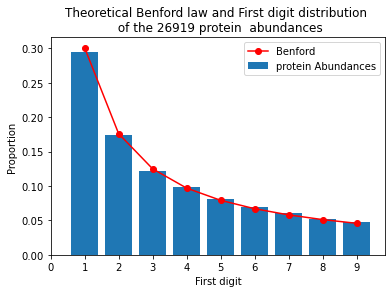

In [24]:
plt.plot(range(1,10), freq_benford, marker="o", color="red")
plt.bar(range(1,10), first_digit_norm)
plt.xticks(ticks=range(0,10))
plt.title(label=f"Theoretical Benford law and First digit distribution \n of the {sum(first_digit)} protein  abundances")
plt.xlabel("First digit")
plt.ylabel("Proportion")
plt.legend(labels = ("Benford", "protein Abundances"));

## G-test
### détermination des effectifs observés (Oi) et calcul des effestifs théoriques (Ei) :

In [266]:
Oi = np.array(first_digit)
Ei = np.array(freq_benford) * sum(first_digit)
print(Oi)
print(Ei)
dif = Ei - Oi
print(dif)

[7942 4691 3273 2642 2176 1885 1638 1390 1282]
[8103.42645328 4740.20060252 3363.22585076 2608.72064016 2131.47996236
 1802.14063007 1561.08522069 1376.97475176 1231.7458884 ]
[161.42645328  49.20060252  90.22585076 -33.27935984 -44.52003764
 -82.85936993 -76.91477931 -13.02524824 -50.2541116 ]


### Hypothèse :
- $H_0$ : Les effectifs observés sont égale pour chaque classes aux effectifs théoriques (Les données suivent la loi de Benford)  
- $H_1$ : Les effectifs observés ne sont pas sont égale pour chaque classes aux effectifs théoriques (Les données ne suivent pas la loi de Benford  

### condition de validité :
Les effectifs observés doivent être non nul pour chacunes des classes  

### Régle de décision du  test :  
- si la p-value < à $\alpha = 5\%$, alors le test est significatif et on rejette l'hypothèse H0 (ne suit pas la loi de Benford).    
- si la p-value > à $\alpha = 5\%$, alors le test est non significatif et on ne rejette pas l'hypothèse H0 (suit la loi de Benford).  
    
## test

In [267]:
results = gtest(Oi, Ei)
print(f"statistic = {results[0]}\np-value = {results[1]}")

statistic = 17.165863037109375
p-value = 0.02842756216544633


In [268]:
results2 = my_gtest(Oi, Ei)
print(f"statistic = {results2[0]}\np-value = {results2[1]}")

statistic = 17.165747326777662
p-value = 0.028428703955379386


### méthode avec la fonction power_divergence de SciPy

In [270]:
power_divergence(Oi, Ei, lambda_=0)

Power_divergenceResult(statistic=17.16574732677782, pvalue=0.02842870395537781)

## Chisquare test

In [272]:
chi2 = chisquare(Oi, Ei)
print(f"statistic = {chi2[0]}\np-value = {chi2[1]}")

statistic = 17.274209428053247
p-value = 0.027377095106173994


In [271]:
power_divergence(Oi, Ei, lambda_=1)

Power_divergenceResult(statistic=17.274209428053247, pvalue=0.027377095106173994)

## Test exact de fisher

In [279]:
fish = np.array([[Oi], [Ei]])
print(fish)

[[[7942.         4691.         3273.         2642.         2176.
   1885.         1638.         1390.         1282.        ]]

 [[8103.42645328 4740.20060252 3363.22585076 2608.72064016 2131.47996236
   1802.14063007 1561.08522069 1376.97475176 1231.7458884 ]]]


In [283]:
chi2_contingency(fish)

(8.555768540906561,
 0.38114358908542184,
 8,
 array([[[8022.71322664, 4715.60030126, 3318.11292538, 2625.36032008,
          2153.73998118, 1843.57031503, 1599.54261035, 1383.48737588,
          1256.8729442 ]],
 
        [[8022.71322664, 4715.60030126, 3318.11292538, 2625.36032008,
          2153.73998118, 1843.57031503, 1599.54261035, 1383.48737588,
          1256.8729442 ]]]))

# Conclusion
On obtientun résultat similaire avec le G-test. Et n'est pas adpté pour nos données.